<a href="https://colab.research.google.com/github/conjure-cp/conjure/blob/main/docs/tutorials/notebooks/KnapsackProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Knapsack problem

Original [The Knapsack Problem](https://conjure.readthedocs.io/en/latest/tutorials/knapsack.html) by Saad Attieh and Christopher Stone. Adapted by Alex Gallagher.

The Knapsack problem is a classical combinatorial optimisation problem, often used in areas of resource allocation. A basic variant of the Knapsack problem is defined as follows:

**Given:**
1. A set of items, each with a weight and a value,
2. A maximum weight which we call capacity,

**find a set of the items such that**
1. The sum of the weights of the items in our set is less than or equal to the capacity, and
2. The sum of the values of the items is maximised.

Informally, think about putting items in a sack such that we maximise the total value of the sack whilst not going over the sack’s weight limit.


In [13]:
!source <(curl -s https://raw.githubusercontent.com/conjure-cp/conjure-notebook/v0.0.9/scripts/install-colab.sh)
%load_ext conjure


Installing Conjure version v2.5.1 and Conjure Notebook version v0.0.9...
Conjure is already installed.
Conjure notebook is already installed.
Conjure: The Automated Constraint Modelling Tool
Release version 2.5.1
Repository version a9cbc2e (2023-11-07 23:44:00 +0000)
The conjure extension is already loaded. To reload it, use:
  %reload_ext conjure


##Model Explained

We begin by showing the entire problem as defined in Essence:

`given items new type enum`


`given weight : function (total) items --> int`


`given gain : function (total) items --> int`


`given capacity : int`


`find picked : set of items`


`maximising sum i in picked . gain(i)`


`such that (sum i in picked . weight(i)) <= capacity`

Going through the problem line by line:

We begin by defining the parameters to the problem. Parameters can be defined outside of the problem, allowing different instances of the same problem to be solved without having to change the specification.

Each parameter is denoted with the given keyword.

`given items new type enum`

This line says that a set of items will be provided as an enum type. Enums are good for labeling items where it makes no sense to attribute a value to each item. So instead of using integers to represent each item, we may just assign names to each item and group the names under an enum type. Below is an example enum declaration, as it would be written in the Conjure Magic cell:

In [14]:
%%conjure
letting items be new type enum {a,b,c,d,e}

```json
{}
```

`a`, `b`, etc. are just names we have given, they could be anything `bread`, `whiskey`, …

`given weight : function (total) items --> int`

Another parameter, a function that maps from each item to an integer, we will treat these integers as weights. Since we are describing integers that will be given as parameters, no domain (lower/upper bound) is required. Here is an example function parameter:

In [15]:
%%conjure+
letting weight be function
    ( a --> 15
    , b --> 25
    , c --> 45
    , d --> 50
    , e --> 60
    )

```json
{}
```

`given gain : function (total) items --> int`

Just the same as the weight parameter, this parameter is used to denote a mapping from each item to a value. An example value for this parameter as it would be defined in the parameter file is:

In [16]:
%%conjure+
letting gain be function
    ( a --> 10
    , b --> 20
    , c --> 40
    , d --> 40
    , e --> 50
    )

```json
{}
```

The final given:

`given capacity : int`

The final parameter – a weight limit. Example value:

In [17]:
%%conjure+
letting capacity be 80

```json
{}
```

`find picked : set of items`

The `find` keyword denotes decision variables, these are the variables for which the solver will search for a valid assignment. As is common in Essence problems, our entire problem is modelled using one decision variable named `picked`. Its type is `set of items`; a set of any size whose elements are taken from the `items` domain. Note, the maximum cardinality of the set is implicitly the size of the `items` domain.

`maximising sum i in picked . gain(i)`

The `maximising` keyword denotes the objective for the solver; a value for the solver to *maximise*. `minimise` is also a valid objective keyword. The expression `sum i in picked .` is a quantifier. The sum says that the values we produce should be summed together. The i in picked says we want to list out every element of the set `picked`. The expression given to the `sum` are described by the expression that follows the full-stop (.). In this case, we are asking for the image of `i` in the `gain` function. That is, for each item in the set, we are looking up the integer value that the item maps to in the `gain` function and summing these integers.

`such that (sum i in picked . weight(i)) <= capacity`

The `such that` keyword denotes a constraint. Here the constraint is formulated in a similar manner to the objective. We are quantifying over the set of chosen items `picked`, looking up the value that the item maps to in the `weights` function and summing these values to together. We enforce that the result of the sum must be less than or equal to the capacity `<= capacity`.

Note that you can post multiple constraints either by using commas between each constraint `,` or by reusing the keyword `such that`.

## Solving the problem

Having run the earlier definition cells, we can now run the model:

In [18]:
%%conjure+
find picked : set of items
maximising sum i in picked . gain(i)
such that (sum i in picked . weight(i)) <= capacity

```json
{"picked": ["b", "d"]}
```

## Visualisations:

We can print the result using python code:

In [19]:
print(picked)

['b', 'd']


We can also show `picked` as a graph:

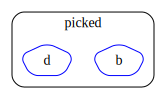

In [20]:
import graphviz

p = graphviz.Digraph('parent')
p.attr(compound='true')


with p.subgraph(name='clusterx', node_attr={'shape': 'pentagon', 'color': 'blue', 'style':'rounded'}) as c:
    for item in picked:
      c.node(str(item))
    c.attr(label='picked')
    c.attr(style='rounded')

p